In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axisartist import Subplot
from matplotlib.ticker import FuncFormatter, Formatter
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
C_to_K = 273.15
skew_slope = 40

In [2]:
def x_from_Tp(T,p):
    x_from_Tp = T + (skew_slope*y_from_p(p))
    return(x_from_Tp)

In [3]:
def y_from_p(p):
    y_from_p = - np.log(p)
    return(y_from_p)

In [4]:
def T_from_xp(x,p):
    T_from_xp = x+(skew_slope*np.log(p))
    return(T_from_xp)

In [5]:
def p_from_y(y):
    p_from_y = np.exp(-y)
    return(p_from_y)

In [6]:
def to_thermo(x,y):
    """Transform (x,y) coordinates to T in degrees celsius and p in mb."""
    p = p_from_y(y)
    T_C = T_from_xp(x,p) - C_to_K
    return T_C , p

In [7]:
def from_thermo(T_C, p):
    """Transform T_C (in degress celsius) and p (in mb) to (x,y)."""
    y= y_from_p(p)
    x= x_from_Tp(T_C + C_to_K, p)
    return x, y

In [8]:
#values along the bottom and left edges
p_bottom = 1050.0
p_top =150
T_min = -40 + C_to_K
T_max = 50 + C_to_K

In [9]:
x_min=x_from_Tp(T_min,p_bottom)
print(x_min)
    

-45.11181772606278


In [10]:
x_max=x_from_Tp(T_max,p_top)
print(x_max)

122.72458823614977


In [11]:
y_min=y_from_p(p_bottom)
print(y_min)

-6.956545443151569


In [12]:
y_max=y_from_p(p_top)
print(y_max)

-5.0106352940962555


In [33]:
p_levels= np.arange(1000, 100, -50)
T_C_levels= np.arange(-80, 40-10, -10)
print (p_levels)

[1000  950  900  850  800  750  700  650  600  550  500  450  400  350
  300  250  200  150]


In [14]:
T_levels= np.arange(-80 + C_to_K, 40 + C_to_K-10, 10)
print(T_levels)

[193.15 203.15 213.15 223.15 233.15 243.15 253.15 263.15 273.15 283.15
 293.15]


In [15]:
theta_levels= np.arange(-40 + C_to_K, 100 + C_to_K-10, 10)
print(theta_levels)

[233.15 243.15 253.15 263.15 273.15 283.15 293.15 303.15 313.15 323.15
 333.15 343.15 353.15]


In [16]:
theta_ep_levels = theta_levels.copy()

In [17]:
mixing_ratios= np.asarray([0.0004, 0.001, 0.002, 0.003, 0.005, 0.008, 0.012, 0.016, 0.02])

In [18]:
import Bolton

14.99475874102182


In [19]:
p_all= np.arange(p_bottom, p_top-1, -1)
print(p_all)

[1050. 1049. 1048. 1047. 1046. 1045. 1044. 1043. 1042. 1041. 1040. 1039.
 1038. 1037. 1036. 1035. 1034. 1033. 1032. 1031. 1030. 1029. 1028. 1027.
 1026. 1025. 1024. 1023. 1022. 1021. 1020. 1019. 1018. 1017. 1016. 1015.
 1014. 1013. 1012. 1011. 1010. 1009. 1008. 1007. 1006. 1005. 1004. 1003.
 1002. 1001. 1000.  999.  998.  997.  996.  995.  994.  993.  992.  991.
  990.  989.  988.  987.  986.  985.  984.  983.  982.  981.  980.  979.
  978.  977.  976.  975.  974.  973.  972.  971.  970.  969.  968.  967.
  966.  965.  964.  963.  962.  961.  960.  959.  958.  957.  956.  955.
  954.  953.  952.  951.  950.  949.  948.  947.  946.  945.  944.  943.
  942.  941.  940.  939.  938.  937.  936.  935.  934.  933.  932.  931.
  930.  929.  928.  927.  926.  925.  924.  923.  922.  921.  920.  919.
  918.  917.  916.  915.  914.  913.  912.  911.  910.  909.  908.  907.
  906.  905.  904.  903.  902.  901.  900.  899.  898.  897.  896.  895.
  894.  893.  892.  891.  890.  889.  888.  887.  8

In [20]:
y_p_levels= y_from_p(p_levels)
print (y_p_levels)

[-6.90775528 -6.85646198 -6.80239476 -6.74523635 -6.68461173 -6.62007321
 -6.55108034 -6.47697236 -6.39692966 -6.30991828 -6.2146081  -6.10924758
 -5.99146455 -5.85793315 -5.70378247 -5.52146092 -5.29831737 -5.01063529]


In [21]:
y_all_p= y_from_p(p_all)
print(y_all_p)

[-6.95654544 -6.95559261 -6.95463886 -6.95368421 -6.95272864 -6.95177216
 -6.95081477 -6.94985646 -6.94889722 -6.94793707 -6.94697599 -6.94601399
 -6.94505106 -6.94408721 -6.94312242 -6.94215671 -6.94119006 -6.94022247
 -6.93925395 -6.93828448 -6.93731408 -6.93634274 -6.93537045 -6.93439721
 -6.93342303 -6.93244789 -6.93147181 -6.93049477 -6.92951677 -6.92853782
 -6.92755791 -6.92657703 -6.9255952  -6.9246124  -6.92362863 -6.92264389
 -6.92165818 -6.9206715  -6.91968385 -6.91869522 -6.91770561 -6.91671502
 -6.91572345 -6.91473089 -6.91373735 -6.91274282 -6.9117473  -6.91075079
 -6.90975328 -6.90875478 -6.90775528 -6.90675478 -6.90575328 -6.90475077
 -6.90374726 -6.90274274 -6.90173721 -6.90073066 -6.89972311 -6.89871453
 -6.89770494 -6.89669433 -6.8956827  -6.89467004 -6.89365635 -6.89264164
 -6.8916259  -6.89060912 -6.88959131 -6.88857246 -6.88755257 -6.88653164
 -6.88550967 -6.88448665 -6.88346259 -6.88243747 -6.8814113  -6.88038408
 -6.8793558  -6.87832647 -6.87729607 -6.87626461 -6

In [22]:
x_T_levels= [x_from_Tp(Ti, p_all) for Ti in T_levels]

In [23]:
x_thetas = [x_from_Tp(Bolton.theta_dry(theta_i, p_all), p_all) for theta_i in theta_levels]

In [35]:
x_mixing_ratios= [x_from_Tp(Bolton.mixing_ratio_line(p_all, mixing_ratio_i)+C_to_K, p_all) for mixing_ratio_i in mixing_ratios]

In [36]:
mesh_T, mesh_p = np.meshgrid( np.arange(-60.0, T_levels.max()-C_to_K+0.1, 0.1), p_all)
theta_ep_mesh = Bolton.theta_ep_field(mesh_T, mesh_p)

In [37]:
def theta_e(T, p, p_0=1000):
    R_d=287.1
    L_v= T*(cp-cl)
    cp=1005
    cl=4218
    cwd=cpd+(w_s*cl)
    w_s=sat_mixing_ratio(p, T)
    term_1= T* (p_0/p)**(R_d/cwd)
    term_2= np.log((L_v*w_s)/(cwd*T))
    theta_e= term_1*term_2
    return (theta_e)

In [38]:
def theta_e_line(T, p, p_0=1000):
    w_s=sat_mixing_ratio(p,T)
    t_e=theta_e(T, p, p_0=1000)
    theta_e_line=t_e
    return (theta_e_line)

In [39]:
skew_grid_helper = GridHelperCurveLinear((from_thermo, to_thermo))


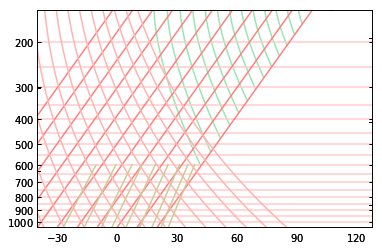

In [41]:
fig= plt.figure()
ax= Subplot(fig, 1, 1, 1, grid_helper=skew_grid_helper)
fig.add_subplot(ax)

for yi in y_p_levels:
    ax.plot((x_min, x_max), (yi, yi), color=(1.0, 0.8, 0.8))
    
for x_T in x_T_levels:
    ax.plot(x_T, y_all_p, color=(1.0,0.5, 0.5))
    
for x_theta in x_thetas:
    ax.plot(x_theta, y_all_p, color=(1.0, 0.7, 0.7))
    
for x_mixing_ratio in x_mixing_ratios:
    good = p_all >= 600 #restrict mixng ration lines to below 600 mb
    ax.plot(x_mixing_ratio[good], y_all_p[good], color=(0.8, 0.8, 0.6))
    
def format_coord(x, y):
    T, p= to_thermo(x, y)
    return "{0:5.1f} C, {1:5.1f} mb".format(float(T), float(p))

ax.format_coord = format_coord
    
n_moist = len(theta_ep_levels)
moist_colors= ((0.6,0.9,0.7),)*n_moist
ax.contour(x_from_Tp(mesh_T+C_to_K, mesh_p), y_from_p(mesh_p), theta_ep_mesh, theta_ep_levels, colors=moist_colors)

#your code for plotting theta_e (reversible)

ax.axis((x_min, x_max, y_min, y_max))

plt.show()

In [30]:
print(Bolton.mix_rat)

14.99475874102182
